# Society of Manufacturers of Electric Vehicles industry Dataset 
This dataset offers a comprehensive view of electric vehicle (EV) sales in India from January 2018 to April 2024 (data till date). It includes monthly sales figures for various EV categories, sourced from the Society of Manufacturers of Electric Vehicles (SMEV) website (https://www.smev.in/).


In [430]:
import pandas as pd
import numpy as np
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.cluster import KMeans

# Filtering out the warnings.
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder


In [431]:
df=pd.read_csv("Consolidated_SMEV.csv")

In [432]:
df.head()

,vehicle_type,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,Two_Wheeler_EV,FY18,96,91,137,116,99,109,160,214,189,176,156,462,2005
1,Two_Wheeler_EV,FY19,486,681,955,1281,1570,2258,2560,3311,3171,2745,3121,5868,28007
2,Two_Wheeler_EV,FY20,3079,1668,1758,1568,1507,1558,2136,3147,2235,2942,2353,2883,26834
3,Two_Wheeler_EV,FY21,85,558,1511,1488,2115,3089,2953,4188,4948,5319,6579,11970,44803
4,Two_Wheeler_EV,FY22,5636,1315,4751,14692,16099,17959,20704,24503,26862,30041,35759,54320,252641


In [433]:
df.isna().sum()#checking for null values

vehicle_type    0
Year            0
Apr             0
May             0
Jun             0
Jul             0
Aug             0
Sep             0
Oct             0
Nov             0
Dec             0
Jan             0
Feb             0
Mar             0
Total           0
dtype: int64

In [434]:
df.shape

(28, 15)

In [435]:
# Data extracted is clean

In [436]:
df.describe()

,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,8076.500000,9156.678571,7974.642857,9116.178571,10346.392857,11046.607143,12444.535714,13451.464286,12762.857143,12594.107143,12912.928571,17626.607143,137509.500000
std,16760.288545,22245.671696,14578.484086,16421.660495,18202.157691,18822.254839,22176.061013,23965.939211,21068.929493,21241.251238,21634.520113,31821.882843,244353.590186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,5.000000,19.000000
25%,88.750000,89.250000,123.000000,114.750000,99.750000,133.250000,148.250000,161.250000,152.250000,136.250000,178.500000,205.250000,1959.250000
50%,560.000000,613.000000,1233.000000,1384.500000,1538.500000,1908.000000,2348.000000,3229.000000,2894.000000,2843.500000,2786.500000,4796.000000,27420.500000
75%,6179.000000,6859.000000,7272.500000,9042.250000,10374.250000,11932.500000,12544.000000,11773.500000,12981.250000,11586.500000,12818.000000,12711.750000,122786.000000
max,66877.000000,105582.000000,48151.000000,54614.000000,62767.000000,64077.000000,78236.000000,92018.000000,75855.000000,82018.000000,82508.000000,136560.000000,944126.000000


In [437]:
df.value_counts()

vehicle_type      Year  Apr    May     Jun    Jul    Aug    Sep    Oct    Nov    Dec    Jan    Feb    Mar     Total 
Bus_EV            FY18  0      2       1      0      0      0      0      11     0      0      0      5       19        1
                  FY19  0      2       1      0      0      0      1      7      2      5      43     5       66        1
Two_Wheeler_EV    FY23  52389  41727   44054  46584  53129  55124  78236  77376  65106  62891  66091  85347   728054    1
                  FY22  5636   1315    4751   14692  16099  17959  20704  24503  26862  30041  35759  54320   252641    1
                  FY21  85     558     1511   1488   2115   3089   2953   4188   4948   5319   6579   11970   44803     1
                  FY20  3079   1668    1758   1568   1507   1558   2136   3147   2235   2942   2353   2883    26834     1
                  FY19  486    681     955    1281   1570   2258   2560   3311   3171   2745   3121   5868    28007     1
                  FY18  96   

In [438]:
df.duplicated().any()#checkng for duplicate values

False

In [439]:
df['Year'] = df['Year'].str.replace('FY', '20')

In [440]:
 df.head()

,vehicle_type,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,Two_Wheeler_EV,2018,96,91,137,116,99,109,160,214,189,176,156,462,2005
1,Two_Wheeler_EV,2019,486,681,955,1281,1570,2258,2560,3311,3171,2745,3121,5868,28007
2,Two_Wheeler_EV,2020,3079,1668,1758,1568,1507,1558,2136,3147,2235,2942,2353,2883,26834
3,Two_Wheeler_EV,2021,85,558,1511,1488,2115,3089,2953,4188,4948,5319,6579,11970,44803
4,Two_Wheeler_EV,2022,5636,1315,4751,14692,16099,17959,20704,24503,26862,30041,35759,54320,252641


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   vehicle_type  28 non-null     object
 1   Year          28 non-null     object
 2   Apr           28 non-null     int64 
 3   May           28 non-null     int64 
 4   Jun           28 non-null     int64 
 5   Jul           28 non-null     int64 
 6   Aug           28 non-null     int64 
 7   Sep           28 non-null     int64 
 8   Oct           28 non-null     int64 
 9   Nov           28 non-null     int64 
 10  Dec           28 non-null     int64 
 11  Jan           28 non-null     int64 
 12  Feb           28 non-null     int64 
 13  Mar           28 non-null     int64 
 14  Total         28 non-null     int64 
dtypes: int64(13), object(2)
memory usage: 3.4+ KB


In [442]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [443]:
 df['Year'] = df['Year'].dt.year

In [444]:
df.groupby('Year').count()

,vehicle_type,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
Year,,,,,,,,,,,,,,
2018,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2019,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2020,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2021,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2022,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2023,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2024,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [445]:
df.groupby('vehicle_type')['Total'].mean()

vehicle_type
Bus_EV                1109.000000
Four_Wheeler_EV      23881.857143
Three_Wheeler_EV    235551.428571
Two_Wheeler_EV      289495.714286
Name: Total, dtype: float64

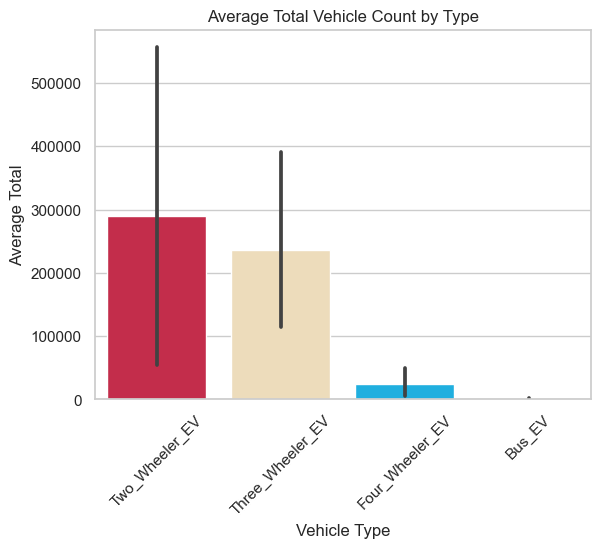

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a bar chart
sns.barplot(x='vehicle_type', y='Total', data=df)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Customize the plot (optional)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Total')
plt.title('Average Total Vehicle Count by Type')
# plt.tight_layout()  # Adjust spacing for better aesthetics

plt.show()

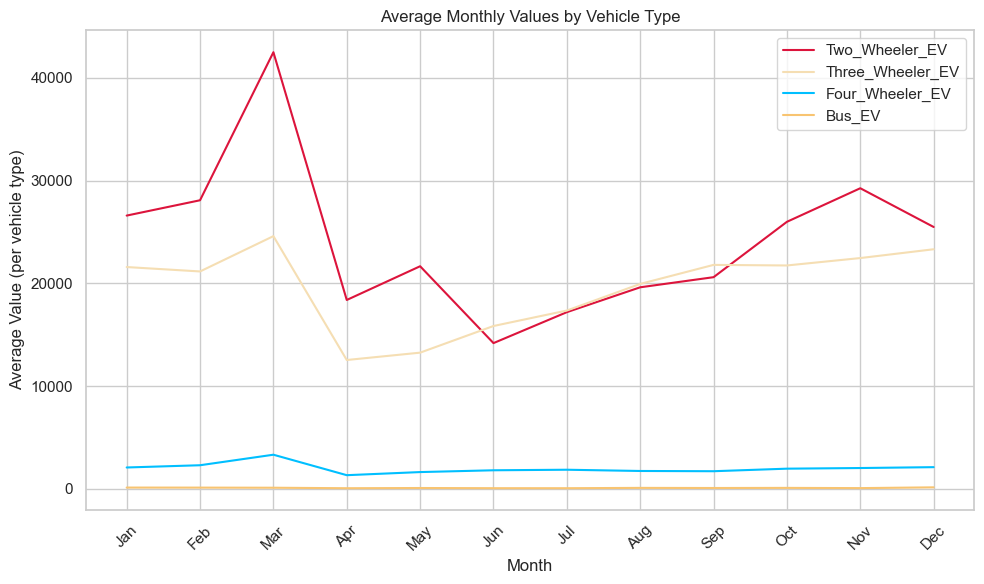

In [447]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group data by vehicle type
vehicle_types = df['vehicle_type'].unique()  # Get unique vehicle types

# Create a new figure with appropriate size
plt.figure(figsize=(10, 6))

# Iterate over vehicle types and plot lines
for vehicle_type in vehicle_types:
    # Select data for the current vehicle type
    vehicle_data = df[df['vehicle_type'] == vehicle_type]

    # Extract month-wise values (adjust column names if needed)
    monthly_values = vehicle_data[month_labels].mean(axis=0)  # Mean for each month

    # Create the line plot
    plt.plot(month_labels, monthly_values, label=vehicle_type)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Value (per vehicle type)')
plt.title('Average Monthly Values by Vehicle Type')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust spacing for aesthetics

plt.show()

Given the sales surge in March and consistent performance in November and January, we recommend implementing targeted promotional campaigns during these months to maximize the impact of our offerings for two-wheeler EVs.

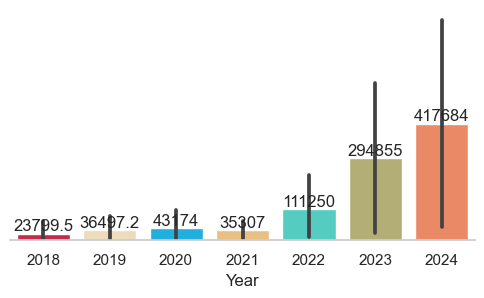

In [448]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(df, x =df['Year'], y = df['Total'])
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel("")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

In [449]:
df.groupby('Year').sum()

,vehicle_type,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
Year,,,,,,,,,,,,,,
2018,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,4933,6975,7397,8964,9099,7639,7523,9909,8989,9022,7176,7572,95198
2019,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,7225,8134,8722,11304,11676,13527,14941,14011,15800,13357,12178,15114,145989
2020,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,11126,10027,11032,12460,13214,16111,15673,18938,16813,16794,16487,14021,172696
2021,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,958,1310,6469,7716,8423,11175,11369,13326,15725,16939,19930,27888,141228
2022,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,14376,2704,11976,17713,30593,36324,40668,44856,53817,51280,57965,82728,445000
2023,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,76435,68959,75259,80690,89782,96282,118282,121877,104641,100777,106937,139498,1179419
2024,Two_Wheeler_EVThree_Wheeler_EVFour_Wheeler_EVB...,111089,158278,102435,116406,126912,128247,139991,153724,141575,144466,140889,206724,1670736


In [450]:
df.groupby('vehicle_type')['Total'].sum()

vehicle_type
Bus_EV                 7763
Four_Wheeler_EV      167173
Three_Wheeler_EV    1648860
Two_Wheeler_EV      2026470
Name: Total, dtype: int64

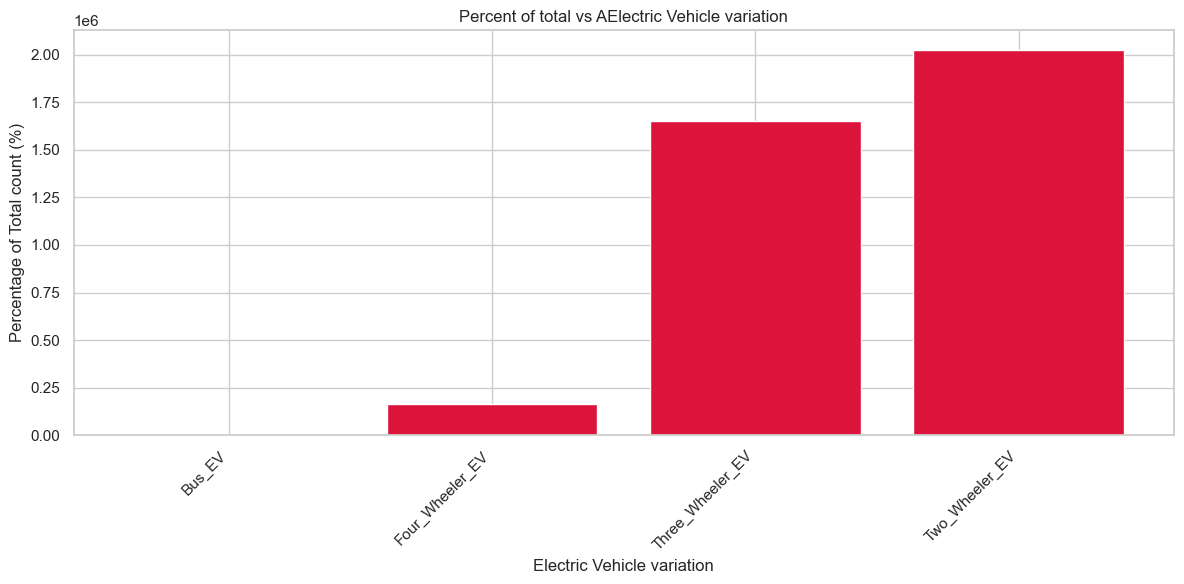

In [451]:
# Calculate the percentage of total for each vehicle type
vehicle_sum = df.groupby('vehicle_type')['Total'].sum()
total_data = len(df)
vehicle_percent = (vehicle_sum / total_data) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(vehicle_sum.index, vehicle_sum.values)

# Add labels and title
plt.xlabel('Electric Vehicle variation')
plt.ylabel('Percentage of Total count (%)')
plt.title('Percent of total vs AElectric Vehicle variation')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [452]:
df.keys()

Index(['vehicle_type', 'Year', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Total'],
      dtype='object')

In [453]:
df1=df[['vehicle_type','Year','Total']]

In [454]:
df1

,vehicle_type,Year,Total
0,Two_Wheeler_EV,2018,2005
1,Two_Wheeler_EV,2019,28007
2,Two_Wheeler_EV,2020,26834
3,Two_Wheeler_EV,2021,44803
4,Two_Wheeler_EV,2022,252641
5,Two_Wheeler_EV,2023,728054
6,Two_Wheeler_EV,2024,944126
7,Three_Wheeler_EV,2018,91970
8,Three_Wheeler_EV,2019,116031
9,Three_Wheeler_EV,2020,143051


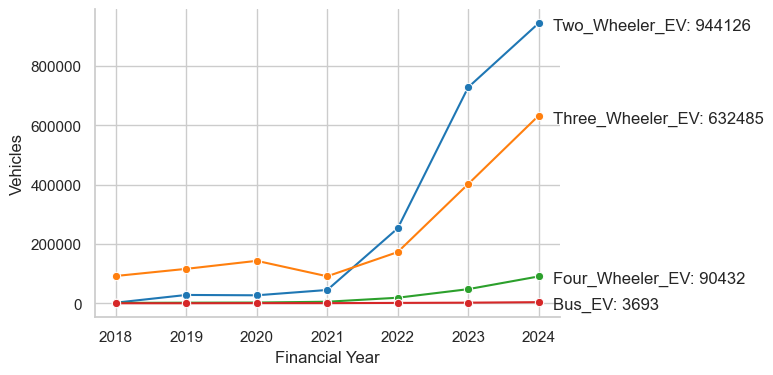

In [455]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=df1, x='Year', y='Total', hue='vehicle_type', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point for each vehicle type
for col in df1['vehicle_type'].unique():
    last_row = df1[df1['vehicle_type'] == col].iloc[-1]  # Select last row for each category
    plt.annotate(f"{last_row['vehicle_type']}: {last_row['Total']}",  # Include total value
                 (last_row['Year'], last_row['Total']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')

ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

# While India's two-wheeler and three-wheeler markets soared in 2024, bus EV sales remained stagnant for the past seven years, highlighting a need for change.

In [456]:
df2=df[['vehicle_type', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Total']]

In [457]:
x1=df2[['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Jan', 'Feb', 'Mar']]

In [458]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


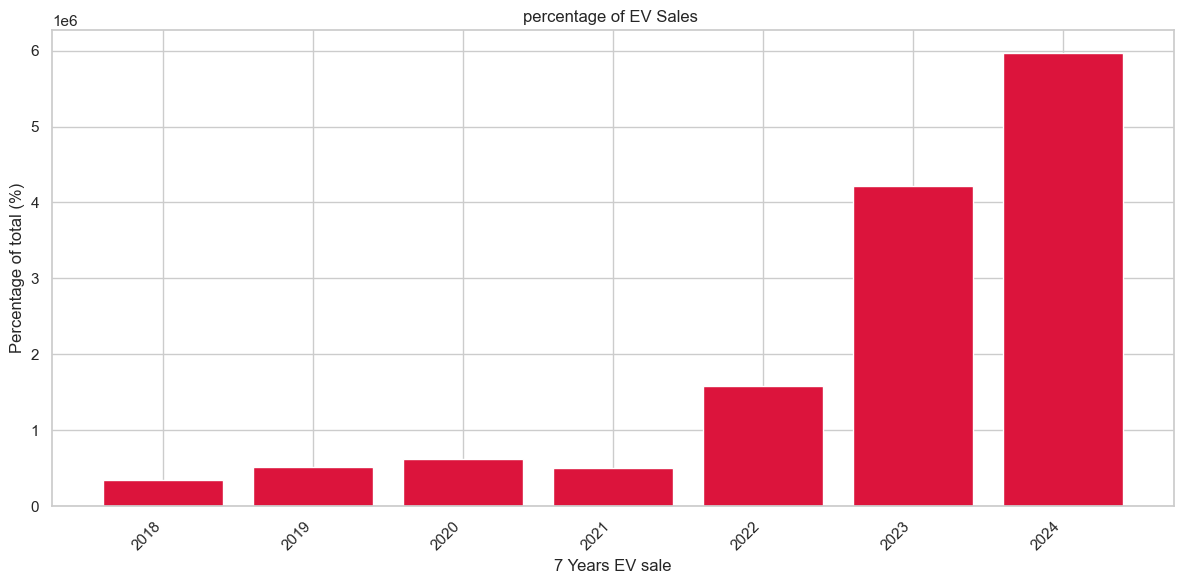

In [459]:
# Calculate the percentage of orders for each approval month
yearly_sale = df.groupby('Year')['Total'].sum()
total_data = len(df)
yearly_percent = (yearly_sale / total_data) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(yearly_percent.index, yearly_percent.values)

# Add labels and title
plt.xlabel('7 Years EV sale')
plt.ylabel('Percentage of total (%)')
plt.title('percentage of EV Sales ')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

A potent combination of increasing public awareness and ongoing developments in EV technology has propelled sales to new heights since 2023, with the trend continuing in 2024.

In [460]:
df.head()

,vehicle_type,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total
0,Two_Wheeler_EV,2018,96,91,137,116,99,109,160,214,189,176,156,462,2005
1,Two_Wheeler_EV,2019,486,681,955,1281,1570,2258,2560,3311,3171,2745,3121,5868,28007
2,Two_Wheeler_EV,2020,3079,1668,1758,1568,1507,1558,2136,3147,2235,2942,2353,2883,26834
3,Two_Wheeler_EV,2021,85,558,1511,1488,2115,3089,2953,4188,4948,5319,6579,11970,44803
4,Two_Wheeler_EV,2022,5636,1315,4751,14692,16099,17959,20704,24503,26862,30041,35759,54320,252641


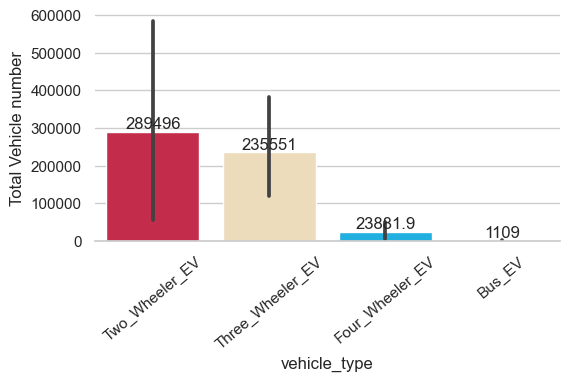

In [461]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(df, x = 'vehicle_type', y = df.Total)
ax.bar_label(ax.containers[0])

plt.xticks(rotation=40)
plt.ylabel("Total Vehicle number ")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

In [477]:
# KMeans works best with numerical features. Since categorical data represents qualitative information (e.g., car types, colors), you need to convert these categories into numbers for the algorithm to understand them. There are two common encoding techniques:
# "labe encoding  or One-Hot Encoding.I have used One-Hot Encoding 
 
categorical_cols = ['vehicle_type']  # List of categorical columns
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_cols])

# Convert sparse matrix to dense array
encoded_features_array = encoded_features.toarray().astype(int)

# Concatenate the encoded features with the remaining DataFrame
encoded_df = pd.concat([df.drop(categorical_cols, axis=1), pd.DataFrame(encoded_features_array)], axis=1)


In [478]:
encoded_df

,Year,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Total,0,1,2,3
0,2018,96,91,137,116,99,109,160,214,189,176,156,462,2005,0,0,0,1
1,2019,486,681,955,1281,1570,2258,2560,3311,3171,2745,3121,5868,28007,0,0,0,1
2,2020,3079,1668,1758,1568,1507,1558,2136,3147,2235,2942,2353,2883,26834,0,0,0,1
3,2021,85,558,1511,1488,2115,3089,2953,4188,4948,5319,6579,11970,44803,0,0,0,1
4,2022,5636,1315,4751,14692,16099,17959,20704,24503,26862,30041,35759,54320,252641,0,0,0,1
5,2023,52389,41727,44054,46584,53129,55124,78236,77376,65106,62891,66091,85347,728054,0,0,0,1
6,2024,66877,105582,46106,54614,62767,64077,75144,92018,75855,82018,82508,136560,944126,0,0,0,1
7,2018,4748,6720,7178,8775,8905,7414,7250,9598,8719,8750,6904,7009,91970,0,0,1,0
8,2019,6593,7276,7556,9844,9990,11130,12305,10517,12501,10533,8786,9000,116031,0,0,1,0
9,2020,7888,8256,9187,10746,11527,14340,13261,15543,14422,13553,13622,10706,143051,0,0,1,0


In [479]:
x=encoded_df.iloc[:,-4:]


In [480]:
mapping = {0: 'Two_wheeler', 1: 'Three_wheeler', 2: 'Four_wheeler', 3: 'Bus_EV '}
x = x.rename(columns=mapping)
x

,Two_wheeler,Three_wheeler,Four_wheeler,Bus_EV
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [481]:
y=encoded_df.iloc[:,-5:-4]
y

,Total
0,2005
1,28007
2,26834
3,44803
4,252641
5,728054
6,944126
7,91970
8,116031
9,143051


In [482]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

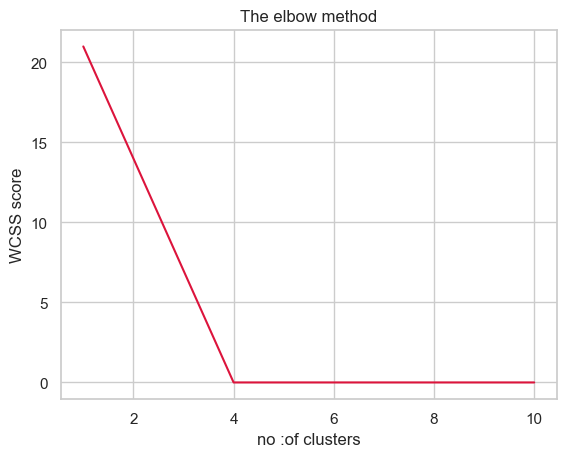

In [483]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("no :of clusters")
plt.ylabel("WCSS score")
plt.show()  

# Training the k model on the data set

In [484]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [485]:
print(y_kmeans)

[2 2 2 2 2 2 2 0 0 0 0 0 0 0 3 3 3 3 3 3 3 1 1 1 1 1 1 1]


In [487]:
# Their are four optimize cluster based on elbow method